**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [63]:
import pandas as pd
import numpy as np

In [64]:
#Loading data
books = pd.read_csv("books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\Users\akhadgi\AppData\Local\Continuum\anaconda3\lib\site-packages\IPyth

### Check no.of records and features given in each dataset

In [65]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


In [66]:
print('Number of records in each dataset: ')
print('books dataset has {0} records'.format(books.shape[0]))
print('users dataset has {0} records'.format(users.shape[0]))
print('ratings dataset has {0} records'.format(ratings.shape[0]))

Number of records in each dataset: 
books dataset has 271360 records
users dataset has 278858 records
ratings dataset has 1149780 records


In [67]:
print('Number of features in each dataset: ')
print('books dataset has {0} features'.format(books.shape[1]))
print('users dataset has {0} features'.format(users.shape[1]))
print('ratings dataset has {0} features'.format(ratings.shape[1]))

Number of features in each dataset: 
books dataset has 8 features
users dataset has 3 features
ratings dataset has 3 features


In [68]:
print('features in each dataset: ')
print('features in books dataset: ')
print(books.columns.values)
print('features in users dataset: ')
print(users.columns.values)
print('features in ratings dataset: ')
print(ratings.columns.values)

features in each dataset: 
features in books dataset: 
['ISBN' 'bookTitle' 'bookAuthor' 'yearOfPublication' 'publisher'
 'imageUrlS' 'imageUrlM' 'imageUrlL']
features in users dataset: 
['userID' 'Location' 'Age']
features in ratings dataset: 
['userID' 'ISBN' 'bookRating']


## Exploring books dataset

In [69]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


### Drop last three columns containing image URLs which will not be required for analysis

In [70]:
books.drop(['imageUrlS','imageUrlM','imageUrlL'], axis = 1, inplace=True)

In [71]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [72]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.


Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [73]:
books[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [74]:
books.loc[(books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard'),:]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [75]:
books = books.loc[(books['yearOfPublication'] != 'Gallimard') & (books['yearOfPublication'] != 'DK Publishing Inc'),:]
books.shape

(271357, 5)

### Change the datatype of yearOfPublication to 'int'

In [76]:
books['yearOfPublication'] = books['yearOfPublication'].astype('int32')

In [77]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [78]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271357 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271357 non-null object
bookTitle            271357 non-null object
bookAuthor           271356 non-null object
yearOfPublication    271357 non-null int32
publisher            271355 non-null object
dtypes: int32(1), object(4)
memory usage: 11.4+ MB


In [79]:
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [80]:
books.dropna(subset=['publisher'],inplace = True)
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            0
dtype: int64

## Exploring Users dataset

In [81]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [82]:
np.sort(users['Age'].unique())

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 113., 114., 115., 116., 118., 119., 123., 124., 127.,
       128., 132., 133., 136., 137., 138., 140., 141., 143., 146., 147.,
       148., 151., 152., 156., 157., 159., 162., 168., 172., 175., 183.,
       186., 189., 199., 200., 201., 204., 207., 20

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [83]:
users['Age'] = np.where(((users['Age'] > 90) | (users['Age'] < 5)) ,np.nan,users['Age'])
np.sort(users['Age'].unique())

array([ 5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14., 15., 16., 17.,
       18., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.,
       31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43.,
       44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55., 56.,
       57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68., 69.,
       70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.,
       83., 84., 85., 86., 87., 88., 89., 90., nan])

### Replace null values in column `Age` with mean

In [84]:
users['Age'].fillna(value = users['Age'].mean(), inplace = True)
np.sort(users['Age'].unique())

array([ 5.        ,  6.        ,  7.        ,  8.        ,  9.        ,
       10.        , 11.        , 12.        , 13.        , 14.        ,
       15.        , 16.        , 17.        , 18.        , 19.        ,
       20.        , 21.        , 22.        , 23.        , 24.        ,
       25.        , 26.        , 27.        , 28.        , 29.        ,
       30.        , 31.        , 32.        , 33.        , 34.        ,
       34.72384042, 35.        , 36.        , 37.        , 38.        ,
       39.        , 40.        , 41.        , 42.        , 43.        ,
       44.        , 45.        , 46.        , 47.        , 48.        ,
       49.        , 50.        , 51.        , 52.        , 53.        ,
       54.        , 55.        , 56.        , 57.        , 58.        ,
       59.        , 60.        , 61.        , 62.        , 63.        ,
       64.        , 65.        , 66.        , 67.        , 68.        ,
       69.        , 70.        , 71.        , 72.        , 73.  

### Change the datatype of `Age` to `int`

In [85]:
users.Age = users.Age.astype('int32')
users.Age.dtype

dtype('int32')

In [86]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [87]:
ratings.shape

(1149780, 3)

In [88]:
n_users = users.shape[0]
n_books = books.shape[0]
print(n_users * n_books)

75669512590


In [89]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [90]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [91]:
ratings_new = ratings[ratings['ISBN'].isin(books['ISBN'])]

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [92]:
ratings_new = ratings_new[ratings_new['userID'].isin(users['userID'])]

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [93]:
print(ratings_new['bookRating'].unique())
ratings_explicit = ratings_new[ratings_new['bookRating'] != 0]
print(ratings_explicit['bookRating'].unique())

[ 0  5  3  6  7  9  8 10  1  4  2]
[ 5  3  6  7  9  8 10  1  4  2]


### Find out which rating has been given highest number of times

In [94]:
ratings_explicit['bookRating'].mode()[0]

8

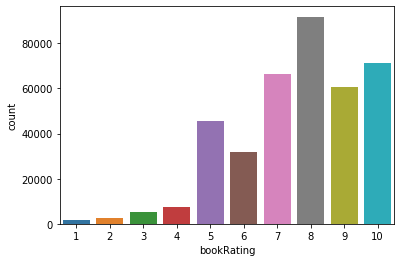

In [95]:
import seaborn as sns
sns.countplot(ratings_explicit['bookRating'])

### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [96]:
counts = ratings_explicit['userID'].value_counts()
ratings_explicit_100 = ratings_explicit[ratings_explicit['userID'].isin(counts[counts >= 100].index)]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [97]:
ratings_explicit_100.isna().sum()

userID        0
ISBN          0
bookRating    0
dtype: int64

In [98]:
ratings_matrix = ratings_explicit_100.pivot(index = 'userID', columns = 'ISBN', values = 'bookRating')
ratings_matrix.head()

ISBN,0000913154,0001046438,000104687X,0001047213,0001047973,000104799X,0001048082,0001053736,0001053744,0001055607,...,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B0001I1KOG,B000234N3A
userID,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2110,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
ratings_matrix.isna().sum()

ISBN
0000913154    448
0001046438    448
000104687X    448
0001047213    448
0001047973    448
000104799X    448
0001048082    447
0001053736    448
0001053744    448
0001055607    448
0001056107    447
0001845039    448
0001935968    448
0001944711    448
0001952803    448
0001953877    448
0002000547    448
0002005018    448
0002005050    448
0002005557    448
0002006588    448
0002115328    448
0002116286    448
0002118580    448
0002154900    448
0002158973    448
0002163713    448
0002176181    448
0002176432    448
0002179695    448
             ... 
9997406990    448
999740923X    448
9997409728    448
9997411757    448
9997411870    448
9997412044    448
9997412958    448
9997507002    448
999750805X    448
9997508769    448
9997512952    448
9997519086    448
9997555635    448
9998914140    448
B00001U0CP    448
B00005TZWI    448
B00006CRTE    448
B00006I4OX    448
B00007FYKW    448
B00008RWPV    448
B000092Q0A    448
B00009EF82    448
B00009NDAN    447
B0000DYXID    448
B0000

In [100]:
ratings_matrix.fillna(0, inplace = True)

### Generate the predicted ratings using SVD with no.of singular values to be 50

In [101]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(ratings_matrix, k = 50)

### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [102]:
userID = 2110

In [103]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

In [104]:
sigma = np.diag(sigma)

In [105]:
all_users_predicted_ratings = np.dot(np.dot(U, sigma), Vt)

In [106]:
preds_df = pd.DataFrame(all_users_predicted_ratings, columns = ratings_matrix.columns)

In [107]:
preds_df.loc[user_id,:].sort_values(ascending = False)

ISBN
0316666343    1.015397
059035342X    0.778665
0345350499    0.697309
0440214041    0.665439
044021145X    0.663549
0312195516    0.642840
0345318862    0.639465
0345313151    0.631446
0380752891    0.629143
051511605X    0.617955
043936213X    0.614288
0385504209    0.613232
0312966970    0.605433
0440213525    0.603722
0812548051    0.602907
0380752859    0.598778
0345322231    0.588352
0345318854    0.579409
0452282152    0.572168
0812548094    0.571572
0812517725    0.564544
0345322215    0.560832
0440211727    0.560544
0380759489    0.559758
0812551478    0.558102
006016848X    0.550815
0345313097    0.547583
0886774802    0.544630
0553280368    0.541396
0446310786    0.540219
                ...   
055321313X   -0.128899
0140251367   -0.131740
0836220854   -0.132223
0670835382   -0.133568
0375706062   -0.134258
0440404193   -0.134705
0679767789   -0.135518
0062501860   -0.135882
0140501800   -0.136724
0515090166   -0.137002
0140328696   -0.137862
0515095826   -0.138192
052594

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [108]:
user_data = ratings_explicit_100[ratings_explicit_100['userID'] == userID]

In [109]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [110]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [111]:
book_data = books[books['ISBN'].isin(user_data['ISBN'])]

In [112]:
book_data.shape

(103, 5)

In [113]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [114]:
user_full_info = (user_data.merge(book_data))

In [115]:
user_full_info.shape

(103, 7)

In [116]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user

In [117]:
num_recommendations = 10
user_row_number = user_id - 1 #UserID starts at zero not 1
sorted_user_predictions = preds_df.loc[user_row_number].sort_values(ascending = False)

In [118]:
recommendations = (books[~books['ISBN'].isin(user_full_info['ISBN'])].
                   merge(pd.DataFrame(sorted_user_predictions).reset_index()).
                   rename(columns = {user_row_number: 'Predictions'}).
                   sort_values('Predictions', ascending = False).
                   iloc[:num_recommendations, :-1])

print('Top {0} recommendations for userID {1} from the books not already rated by that user is as below: '.format(num_recommendations,userID))
recommendations

Top 10 recommendations for userID 2110 from the books not already rated by that user is as below: 


,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
655,0345370775,Jurassic Park,Michael Crichton,1999,Ballantine Books
3221,0345384911,Crystal Line,Anne McCaffrey,1993,Del Rey Books
2845,043935806X,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,2003,Scholastic
252,044021145X,The Firm,John Grisham,1992,Bantam Dell Publishing Group
1120,0451151259,Eyes of the Dragon,Stephen King,1988,Penguin Putnam~mass
2804,0439139597,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,2000,Scholastic
1810,0439064872,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,2000,Scholastic
539,0380759497,Xanth 15: The Color of Her Panties,Piers Anthony,1992,Eos
1319,0345353145,Sphere,MICHAEL CRICHTON,1988,Ballantine Books
3150,0451167317,The Dark Half,Stephen King,1994,Signet Book
